## Authors : Team MamaAfrica

### IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display,HTML
import pandas_profiling
import numpy as np
import missingno as msno
from dython.nominal import associations
from scipy.stats import norm, boxcox,skew
from geopy import distance
%matplotlib inline

### Data Ingestion

In [2]:
data = pd.read_csv("Train.csv")
riders = pd.read_csv("Riders.csv")
test_zindi = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")

### Let's see what we have here

In [6]:
data.head().T

0               1  \
Order No                                   Order_No_4211  Order_No_25375   
User Id                                      User_Id_633    User_Id_2285   
Vehicle Type                                        Bike            Bike   
Platform Type                                          3               3   
Personal or Business                            Business        Personal   
Placement - Day of Month                               9              12   
Placement - Weekday (Mo = 1)                           5               5   
Placement - Time                              9:35:46 AM     11:16:16 AM   
Confirmation - Day of Month                            9              12   
Confirmation - Weekday (Mo = 1)                        5               5   
Confirmation - Time                           9:40:10 AM     11:23:21 AM   
Arrival at Pickup - Day of Month                       9              12   
Arrival at Pickup - Weekday (Mo = 1)                   5               5   
Arrival at Pickup - Time                     10:04:47 AM     11:40:22 AM   
Pickup - Day of Month                                  9              12   
Pickup - Weekday (Mo = 1)                              5               5   
Pickup - Time                                10:27:30 AM     11:44:09 AM   
Arrival at Destination - Day of Month                  9              12   
Arrival at Destination - Weekday (Mo = 1)              5               5   
Arrival at Destination - Time                10:39:55 AM     12:17:22 PM   
Distance (KM)                                          4              16   
Temperature                                         20.4            26.4   
Precipitation in millimeters                         NaN             NaN   
Pickup Lat                                      -1.31775        -1.35145   
Pickup Long                                      36.8304         36.8993   
Destination Lat                                 -1.30041          -1.295   
Destination Long                                 36.8297         36.8144   
Rider Id                                    Rider_Id_432    Rider_Id_856   
Time from Pickup to Arrival                          745            1993   

                                                       2              3  \
Order No                                   Order_No_1899  Order_No_9336   
User Id                                      User_Id_265   User_Id_1402   
Vehicle Type                                        Bike           Bike   
Platform Type                                          3              3   
Personal or Business                            Business       Business   
Placement - Day of Month                              30             15   
Placement - Weekday (Mo = 1)                           2              5   
Placement - Time                             12:39:25 PM     9:25:34 AM   
Confirmation - Day of Month                           30             15   
Confirmation - Weekday (Mo = 1)                        2              5   
Confirmation - Time                          12:42:44 PM     9:26:05 AM   
Arrival at Pickup - Day of Month                      30             15   
Arrival at Pickup - Weekday (Mo = 1)                   2              5   
Arrival at Pickup - Time                     12:49:34 PM     9:37:56 AM   
Pickup - Day of Month                                 30             15   
Pickup - Weekday (Mo = 1)                              2              5   
Pickup - Time                                12:53:03 PM     9:43:06 AM   
Arrival at Destination - Day of Month                 30             15   
Arrival at Destination - Weekday (Mo = 1)              2              5   
Arrival at Destination - Time                 1:00:38 PM    10:05:27 AM   
Distance (KM)                                          3              9   
Temperature                                          NaN           19.2   
Precipitation in millimeters                     

In [7]:
test_zindi.head().T

0               1  \
Order No                              Order_No_19248  Order_No_12736   
User Id                                 User_Id_3355    User_Id_3647   
Vehicle Type                                    Bike            Bike   
Platform Type                                      3               3   
Personal or Business                        Business        Business   
Placement - Day of Month                          27              17   
Placement - Weekday (Mo = 1)                       3               5   
Placement - Time                          4:44:10 PM     12:57:35 PM   
Confirmation - Day of Month                       27              17   
Confirmation - Weekday (Mo = 1)                    3               5   
Confirmation - Time                       4:44:29 PM     12:59:17 PM   
Arrival at Pickup - Day of Month                  27              17   
Arrival at Pickup - Weekday (Mo = 1)               3               5   
Arrival at Pickup - Time                  4:53:04 PM      1:20:27 PM   
Pickup - Day of Month                             27              17   
Pickup - Weekday (Mo = 1)                          3               5   
Pickup - Time                             5:06:47 PM      1:25:37 PM   
Distance (KM)                                      8               5   
Temperature                                      NaN             NaN   
Precipitation in millimeters                     NaN             NaN   
Pickup Lat                                  -1.33327        -1.27264   
Pickup Long                                  36.8708         36.7947   
Destination Lat                             -1.30525        -1.27701   
Destination Long                             36.8224         36.8239   
Rider Id                                Rider_Id_192    Rider_Id_868   

                                                 2               3  \
Order No                              Order_No_768  Order_No_15332   
User Id                               User_Id_2154    User_Id_2910   
Vehicle Type                                  Bike            Bike   
Platform Type                                    3               3   
Personal or Business                      Business        Business   
Placement - Day of Month                        27              17   
Placement - Weekday (Mo = 1)                     4               1   
Placement - Time                       11:08:14 AM      1:51:35 PM   
Confirmation - Day of Month                     27              17   
Confirmation - Weekday (Mo = 1)                  4               1   
Confirmation - Time                    11:25:05 AM      1:53:27 PM   
Arrival at Pickup - Day of Month                27              17   
Arrival at Pickup - Weekday (Mo = 1)             4               1   
Arrival at Pickup - Time               11:33:20 AM      2:02:41 PM   
Pickup - Day of Month                           27              17   
Pickup - Weekday (Mo = 1)                        4               1   
Pickup - Time                          11:57:54 AM      2:16:52 PM   
Distance (KM)                                    5               5   
Temperature                                   22.8            24.5   
Precipitation in millimeters                   NaN             NaN   
Pickup Lat                                -1.29089         -1.2905   
Pickup Long                                 36.823         36.8096   
Destination Lat                           -1.27657        -1.30338   
Destination Long                           36.8514         36.7907   
Rider Id                               Rider_Id_26    Rider_Id_685   

                                                   4  
Order No                              Order_No_21373  
User Id                                 User_Id_1205  
Vehicle Type                                    Bike  
Platform Type                                      3  
Personal or Business                        Business  
Placement - Day of Month   

In [8]:
set(data.columns).difference(set(test_zindi.columns))

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

In [9]:
riders.head()

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [10]:
submission.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                        567.0
1  Order_No_12736                       4903.0
2    Order_No_768                       5649.0
3  Order_No_15332                          NaN
4  Order_No_21373                          NaN

### Cleaning, Epxploration and Analyzing

In [3]:
profile = data.copy().profile_report(title='Data report')
profile.to_file(output_file="Data_report.html")
display(HTML('<iframe src="Data_report.html" height="500" width="100%"></iframe> '))

In [4]:
data["Vehicle Type"].unique()
test_zindi["Vehicle Type"].unique()

array(['Bike'], dtype=object)

In [16]:
test_zindi.drop(columns=["Vehicle Type"],inplace=True)
data.drop(columns=["Vehicle Type"],inplace=True)

In [17]:
data.shape, test_zindi.shape

((21201, 28), (7068, 24))

#### Change types

In [18]:
from pandas.api.types import is_numeric_dtype
def change_types(df):
    int_to_float_columns = ["Time from Pickup to Arrival","Distance (KM)"]
    for column in df.columns:
        if(not is_numeric_dtype(df[column])):
            df[column] = df[column].astype("category")
        elif(np.issubdtype(df[column], np.int64) and column not in int_to_float_columns):
            df[column] = df[column].astype("category")
        elif(column in int_to_float_columns):
            df[column] = df[column].astype("float")

In [19]:
change_types(data)
change_types(test_zindi)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 28 columns):
Order No                                     21201 non-null category
User Id                                      21201 non-null category
Platform Type                                21201 non-null category
Personal or Business                         21201 non-null category
Placement - Day of Month                     21201 non-null category
Placement - Weekday (Mo = 1)                 21201 non-null category
Placement - Time                             21201 non-null category
Confirmation - Day of Month                  21201 non-null category
Confirmation - Weekday (Mo = 1)              21201 non-null category
Confirmation - Time                          21201 non-null category
Arrival at Pickup - Day of Month             21201 non-null category
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null category
Arrival at Pickup - Time                     21201 non-null cat

#### test if data was splitted with respect to time

In [21]:
train_order_number = data["order_number"] = data["Order No"].apply(lambda o:int(o.replace("Order_No_",""))).astype("int")
test_order_number = test_zindi["order_number"] = test_zindi["Order No"].apply(lambda o:int(o.replace("Order_No_",""))).astype("int")

In [22]:
train_order_number.min(),train_order_number.max(),test_order_number.min(),test_order_number.max()

(1, 28268, 0, 28265)

#### Some fact checking

In [23]:
# test if orders are not mixed
train_orders_set = set(train_order_number)
test_orders_set = set(test_order_number)
train_orders_set.intersection(test_orders_set)

set()

In [24]:
# test if number of unique commands is equal to the number of observations   
len(train_orders_set.union(test_orders_set)) == len(data)+len(test_zindi)

True

In [25]:
print(sorted(train_orders_set))

[1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 18, 20, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 79, 80, 81, 83, 84, 86, 88, 89, 91, 92, 95, 96, 97, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 120, 121, 122, 123, 125, 126, 130, 131, 132, 133, 134, 136, 139, 140, 141, 142, 144, 145, 148, 149, 150, 151, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 210, 211, 212, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 258, 259, 260, 262, 263, 266, 267, 268, 274, 275, 276, 277, 281, 283, 284, 285, 286, 288, 289, 290, 29

#### Missing values

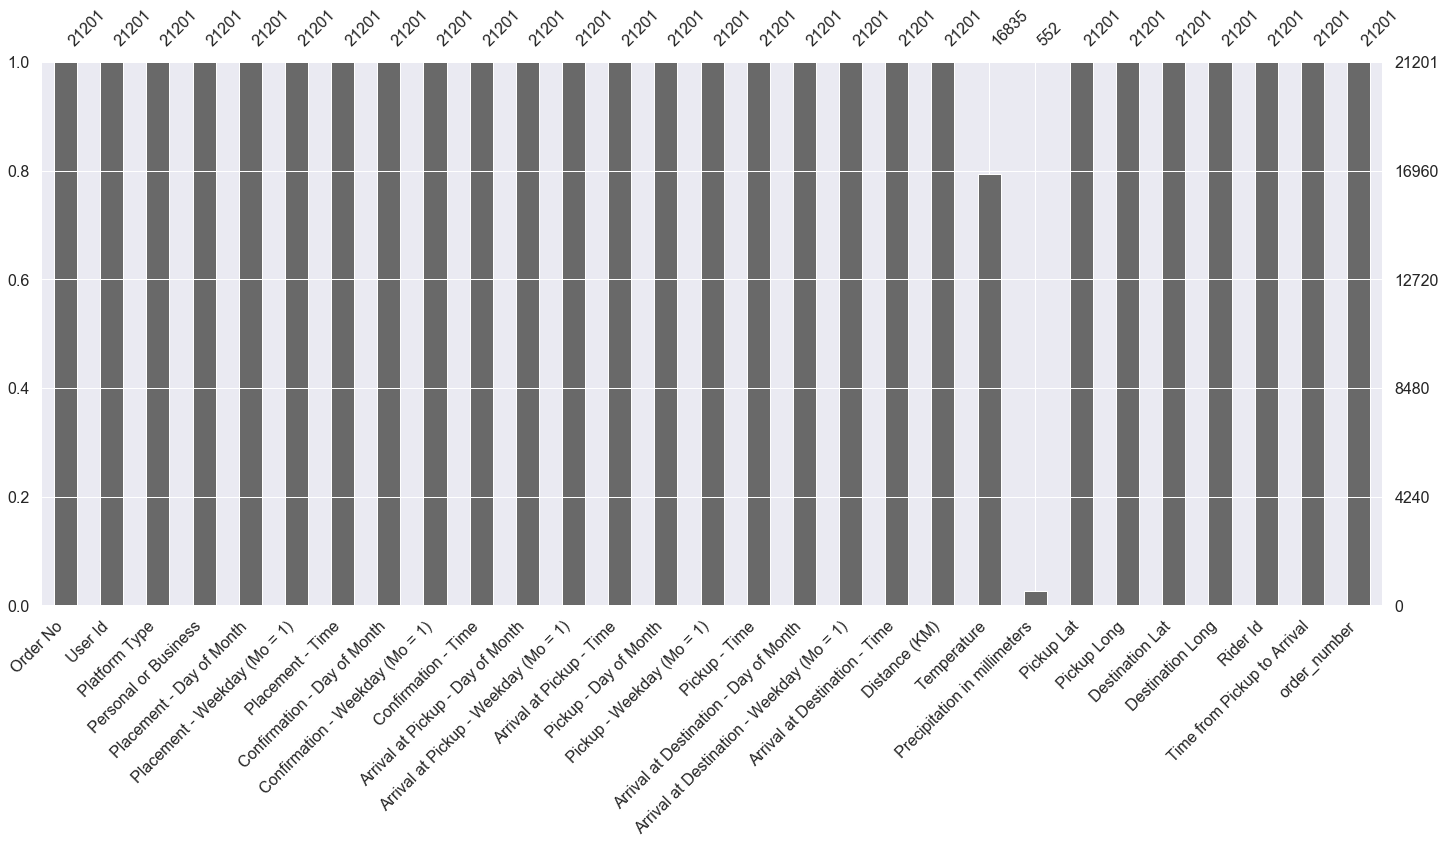

In [26]:
msno.bar(data)

In [27]:
### checks if order numbers are sequential in time
data.sort_values(by="order_number")

Order No       User Id Platform Type Personal or Business  \
6831       Order_No_1   User_Id_556             1             Personal   
720        Order_No_2  User_Id_3517             3             Business   
18360      Order_No_3   User_Id_635             3             Business   
694        Order_No_4  User_Id_2377             3             Personal   
20620      Order_No_6  User_Id_3550             1             Personal   
...               ...           ...           ...                  ...   
3936   Order_No_28263   User_Id_238             3             Business   
14908  Order_No_28264   User_Id_816             3             Business   
10254  Order_No_28266   User_Id_738             3             Business   
7990   Order_No_28267  User_Id_2956             3             Business   
6882   Order_No_28268  User_Id_2523             3             Business   

      Placement - Day of Month Placement - Weekday (Mo = 1) Placement - Time  \
6831                         9                            2      12:10:50 PM   
720                         18                            4      10:09:10 AM   
18360                       29                            3       3:00:12 PM   
694                         12                            2       2:58:52 PM   
20620                        3                            5       2:37:48 PM   
...                        ...                          ...              ...   
3936                        16                            2      11:14:54 AM   
14908                       21                            1      10:52:32 AM   
10254                       28                            5       8:39:13 AM   
7990                         1                            1       4:13:51 PM   
6882                        20                            2      12:50:23 PM   

      Confirmation - Day of Month Confirmation - Weekday (Mo = 1)  \
6831                            9                               2   
720                            18                               4   
18360                          29                               3   
694                            12                               2   
20620                           3                               5   
...                           ...                             ...   
3936                           16                               2   
14908                          21                               1   
10254                          28                               5   
7990                            1                               1   
6882                           20                               2   

      Confirmation - Time  ... Distance (KM) Temperature  \
6831          12:12:24 PM  ...           4.0        21.8   
720           10:09:50 AM  ...          16.0         NaN   
18360          3:16:26 PM  ...           4.0        20.9   
694            2:59:22 PM  ...           5.0         NaN   
20620          3:29:21 PM  ...           4.0        25.0   
...                   ...  ...           ...         ...   
3936          12:08:52 PM  ...           3.0         NaN   
14908         10:54:19 AM  ...           4.0        25.4   
10254          8:42:37 AM  ...           6.0        20.8   
7990           4:42:44 PM  ...          10.0        27.4   
6882          12:52:33 PM  ...          26.0        19.8   

      Precipitation in millimeters Pickup Lat Pickup Long Destination Lat  \
6831                           NaN  -1.274173   36.796911       -1.265971   
720                            NaN  -1.300921   36.828195       -1.388201   
18360                          NaN  -1.260234   36.799055       -1.283333   
694                            NaN  -1.301607   36.840449       -1.285565   
20620                          NaN  -1.300391   36.734016       -1.299820   
...                            ...        ...         ...             ...   
3936                           NaN  -1.307787   36.844321       -1.308366 

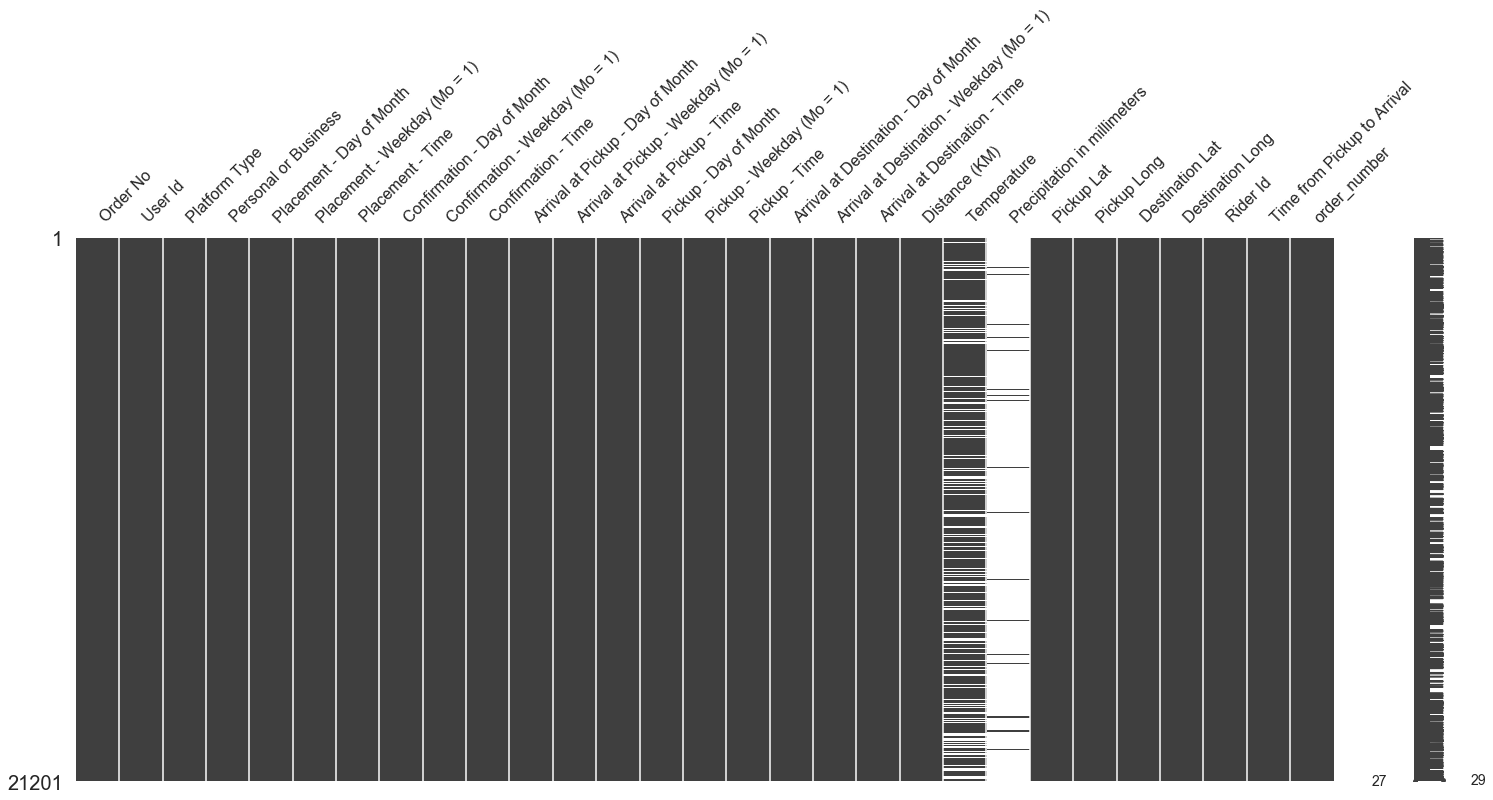

In [28]:
msno.matrix(data.sort_values(by="order_number"))

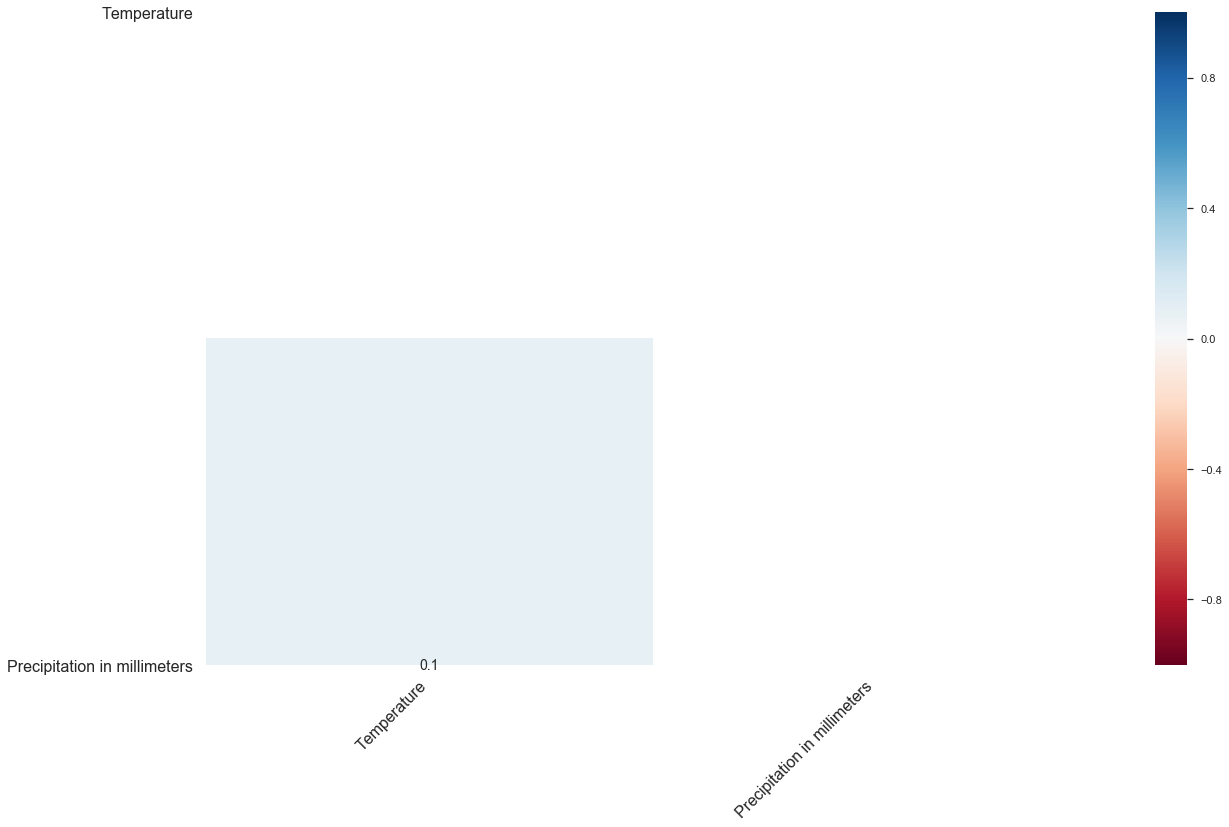

In [29]:
msno.heatmap(data)

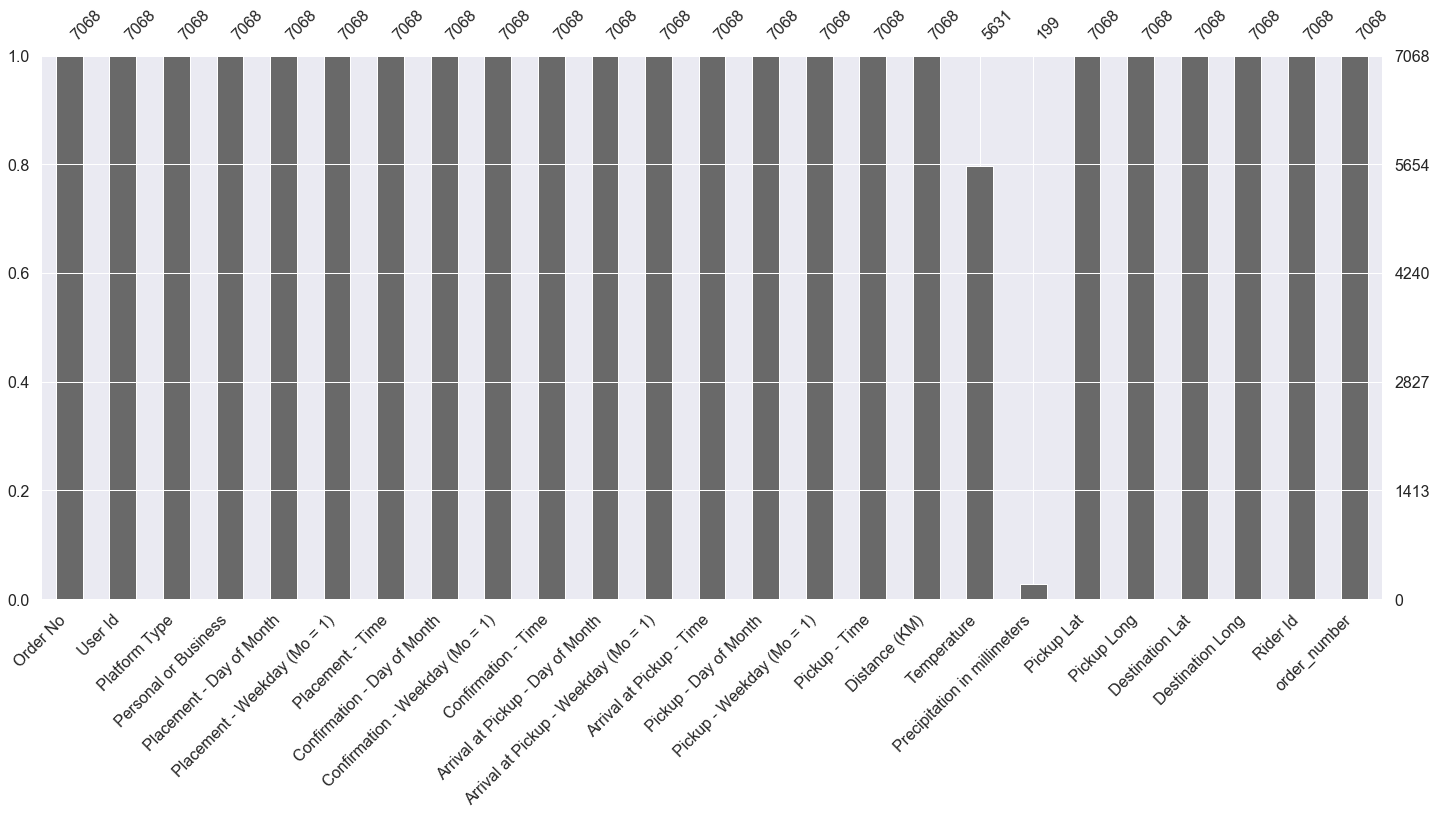

In [30]:
msno.bar(test_zindi)

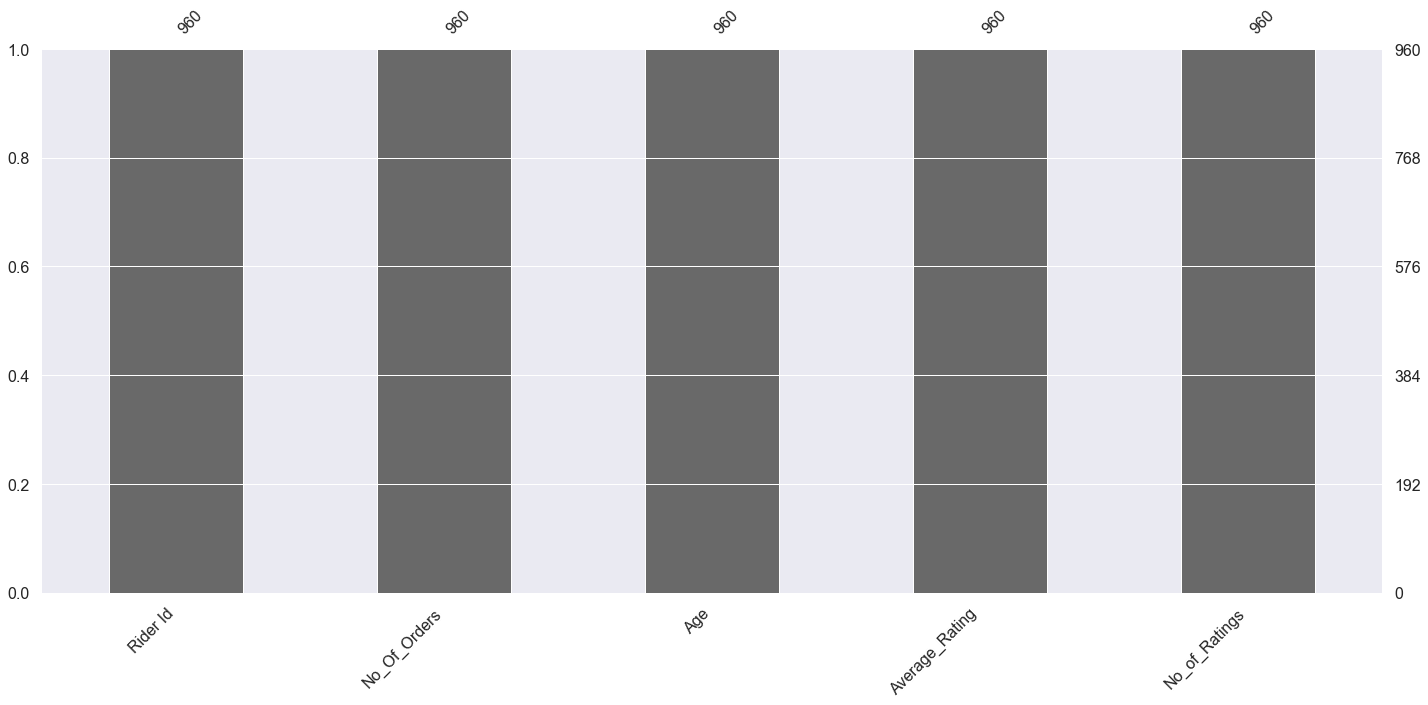

In [31]:
msno.bar(riders)

#### check the validity of Time from Pickup to Arrival by calculating it from the columns

In [32]:
duree = (pd.to_datetime(data["Arrival at Destination - Time"])-pd.to_datetime(data["Pickup - Time"])).astype('timedelta64[s]')
(duree == data["Time from Pickup to Arrival"]).sum()/len(data)

1.0

#### Fill missing values

In [33]:
# fill temperature with mean
mean_temp = data.Temperature.mean()
data.Temperature.fillna(value=mean_temp,inplace=True)
test_zindi.Temperature.fillna(value=mean_temp,inplace=True)

data.drop(columns=["Precipitation in millimeters","order_number"],inplace=True)
test_zindi.drop(columns=["Precipitation in millimeters","order_number"],inplace=True)

#### Merge data with riders

In [34]:
set(data["Rider Id"]).difference(set(riders["Rider Id"])), set(test_zindi["Rider Id"]).difference(set(riders["Rider Id"]))

(set(), set())

In [35]:
data = data.merge(riders,on="Rider Id")
test_zindi = test_zindi.merge(riders,on="Rider Id")

In [36]:
data.head().T

0               1  \
Order No                                   Order_No_4211  Order_No_27440   
User Id                                      User_Id_633    User_Id_2642   
Platform Type                                          3               3   
Personal or Business                            Business        Personal   
Placement - Day of Month                               9              18   
Placement - Weekday (Mo = 1)                           5               5   
Placement - Time                              9:35:46 AM      3:41:17 PM   
Confirmation - Day of Month                            9              18   
Confirmation - Weekday (Mo = 1)                        5               5   
Confirmation - Time                           9:40:10 AM      3:41:30 PM   
Arrival at Pickup - Day of Month                       9              18   
Arrival at Pickup - Weekday (Mo = 1)                   5               5   
Arrival at Pickup - Time                     10:04:47 AM      4:07:16 PM   
Pickup - Day of Month                                  9              18   
Pickup - Weekday (Mo = 1)                              5               5   
Pickup - Time                                10:27:30 AM      4:13:37 PM   
Arrival at Destination - Day of Month                  9              18   
Arrival at Destination - Weekday (Mo = 1)              5               5   
Arrival at Destination - Time                10:39:55 AM      5:01:43 PM   
Distance (KM)                                          4              20   
Temperature                                         20.4            24.5   
Pickup Lat                                      -1.31775        -1.32677   
Pickup Long                                      36.8304         36.7878   
Destination Lat                                 -1.30041        -1.35624   
Destination Long                                 36.8297         36.9043   
Rider Id                                    Rider_Id_432    Rider_Id_432   
Time from Pickup to Arrival                          745            2886   
No_Of_Orders                                        1637            1637   
Age                                                 1309            1309   
Average_Rating                                      13.8            13.8   
No_of_Ratings                                        549             549   

                                                        2               3  \
Order No                                   Order_No_14170  Order_No_21727   
User Id                                      User_Id_3339    User_Id_3523   
Platform Type                                           3               3   
Personal or Business                             Business        Personal   
Placement - Day of Month                               31               2   
Placement - Weekday (Mo = 1)                            5               2   
Placement - Time                              12:51:41 PM      7:12:10 AM   
Confirmation - Day of Month                            31               2   
Confirmation - Weekday (Mo = 1)                         5               2   
Confirmation - Time                            1:12:49 PM      7:12:29 AM   
Arrival at Pickup - Day of Month                       31               2   
Arrival at Pickup - Weekday (Mo = 1)                    5               2   
Arrival at Pickup - Time                       1:20:02 PM      7:35:24 AM   
Pickup - Day of Month                                  31               2   
Pickup - Weekday (Mo = 1)                               5               2   
Pickup - Time                                  1:33:08 PM      7:38:46 AM   
Arrival at Destination - Day of Month                  31               2   
Arrival at Destination - Weekday (Mo = 1)               5               2   
Arrival at Destination - Time                  2:16:43 PM      8:28:32 AM   
Distance (KM)                                           6              18   
Tempe

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 31 columns):
Order No                                     21201 non-null category
User Id                                      21201 non-null category
Platform Type                                21201 non-null category
Personal or Business                         21201 non-null category
Placement - Day of Month                     21201 non-null category
Placement - Weekday (Mo = 1)                 21201 non-null category
Placement - Time                             21201 non-null category
Confirmation - Day of Month                  21201 non-null category
Confirmation - Weekday (Mo = 1)              21201 non-null category
Confirmation - Time                          21201 non-null category
Arrival at Pickup - Day of Month             21201 non-null category
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null category
Arrival at Pickup - Time                     21201 non-null cat

In [37]:
data = data.astype({"Rider Id":"category","Age":"float","No_Of_Orders":"float","No_of_Ratings":"float","Average_Rating":"float"},copy=False)
test_zindi = test_zindi.astype({"Rider Id":"category","Age":"float","No_Of_Orders":"float","No_of_Ratings":"float","Average_Rating":"float"},copy=False)

In [38]:
test_zindi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 27 columns):
Order No                                7068 non-null category
User Id                                 7068 non-null category
Platform Type                           7068 non-null category
Personal or Business                    7068 non-null category
Placement - Day of Month                7068 non-null category
Placement - Weekday (Mo = 1)            7068 non-null category
Placement - Time                        7068 non-null category
Confirmation - Day of Month             7068 non-null category
Confirmation - Weekday (Mo = 1)         7068 non-null category
Confirmation - Time                     7068 non-null category
Arrival at Pickup - Day of Month        7068 non-null category
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null category
Arrival at Pickup - Time                7068 non-null category
Pickup - Day of Month                   7068 non-null category
Pickup - We

### Correlation study

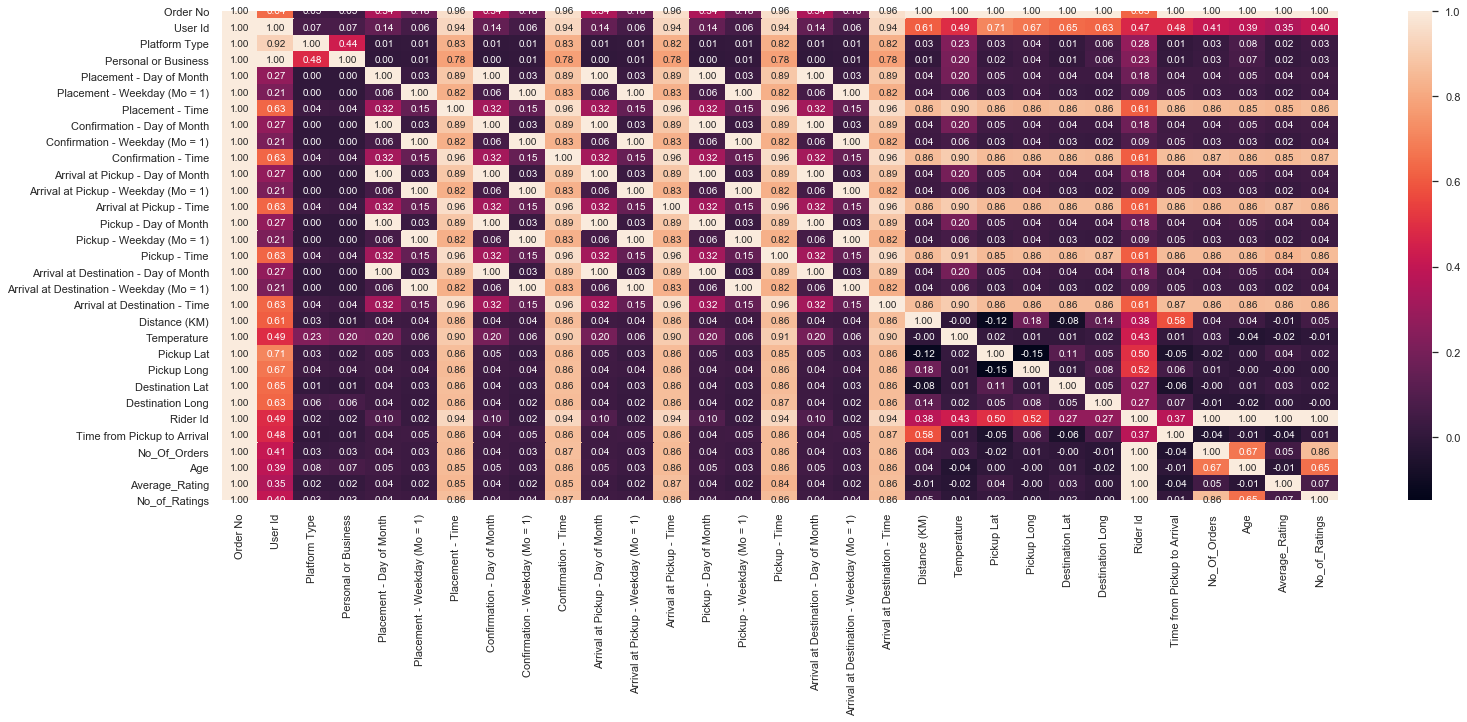

In [39]:
nominal_columns = list(data.select_dtypes(exclude=["number"]).columns)
associations(data,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

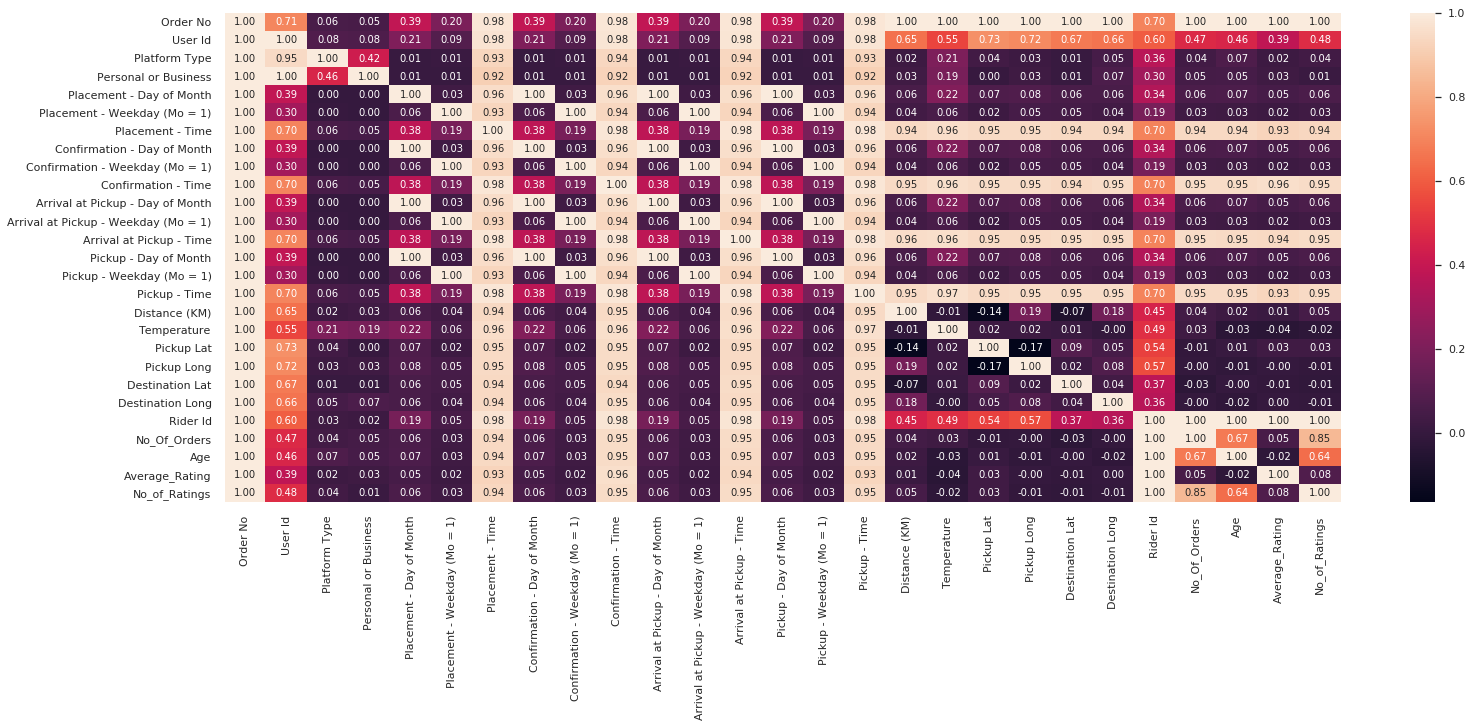

In [94]:
nominal_columns = list(test_zindi.select_dtypes(exclude=["number"]).columns)
associations(test_zindi,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

#### observations :
- Some high correlation like in time variables are due to the larger number of their unique values
- One day month variable is sufficicent
- One week day variable is sufficicent
- Drop platform type and Personal or Business

#### Drop not useful columns

In [40]:
columns_to_drop_both = ['Platform Type', 
       'Personal or Business',
       'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
       'Arrival at Pickup - Time']
columns_to_drop_train = ['Arrival at Destination - Day of Month',
        'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time']
data.drop(columns=columns_to_drop_both + columns_to_drop_train,inplace=True)
test_zindi.drop(columns=columns_to_drop_both,inplace=True)

In [41]:
data.head(6)

Order No       User Id Pickup - Day of Month  \
0   Order_No_4211   User_Id_633                     9   
1  Order_No_27440  User_Id_2642                    18   
2  Order_No_14170  User_Id_3339                    31   
3  Order_No_21727  User_Id_3523                     2   
4   Order_No_8301    User_Id_87                    22   
5  Order_No_10440  User_Id_2801                    29   

  Pickup - Weekday (Mo = 1) Pickup - Time  Distance (KM)  Temperature  \
0                         5   10:27:30 AM            4.0    20.400000   
1                         5    4:13:37 PM           20.0    24.500000   
2                         5    1:33:08 PM            6.0    24.700000   
3                         2    7:38:46 AM           18.0    15.200000   
4                         2   10:59:40 AM            7.0    19.200000   
5                         3   12:25:10 PM           26.0    23.258889   

   Pickup Lat  Pickup Long  Destination Lat  Destination Long      Rider Id  \
0   -1.317755    36.830370        -1.300406         36.829741  Rider_Id_432   
1   -1.326774    36.787807        -1.356237         36.904295  Rider_Id_432   
2   -1.255189    36.782203        -1.273412         36.818206  Rider_Id_432   
3   -1.290315    36.757377        -1.223520         36.802061  Rider_Id_432   
4   -1.273524    36.799220        -1.300431         36.752427  Rider_Id_432   
5   -1.267427    36.787083        -1.343640         36.892534  Rider_Id_432   

   Time from Pickup to Arrival  No_Of_Orders     Age  Average_Rating  \
0                        745.0        1637.0  1309.0            13.8   
1                       2886.0        1637.0  1309.0            13.8   
2                       2615.0        1637.0  1309.0            13.8   
3                       2986.0        1637.0  1309.0            13.8   
4                       1602.0        1637.0  1309.0            13.8   
5                       2313.0        1637.0  1309.0            13.8   

   No_of_Ratings  
0          549.0  
1          549.0  
2          549.0  
3          549.0  
4          549.0  
5          549.0

### Compute distance with geopy

In [42]:
def compute_distance(row):
    src = (row["Pickup Lat"],row["Pickup Long"])
    dest= (row["Destination Lat"],row["Destination Long"])
    return distance.distance(src,dest).km

In [43]:
data["geopy_distance"] = data.apply(compute_distance,axis=1)
test_zindi["geopy_distance"] = test_zindi.apply(compute_distance,axis=1)

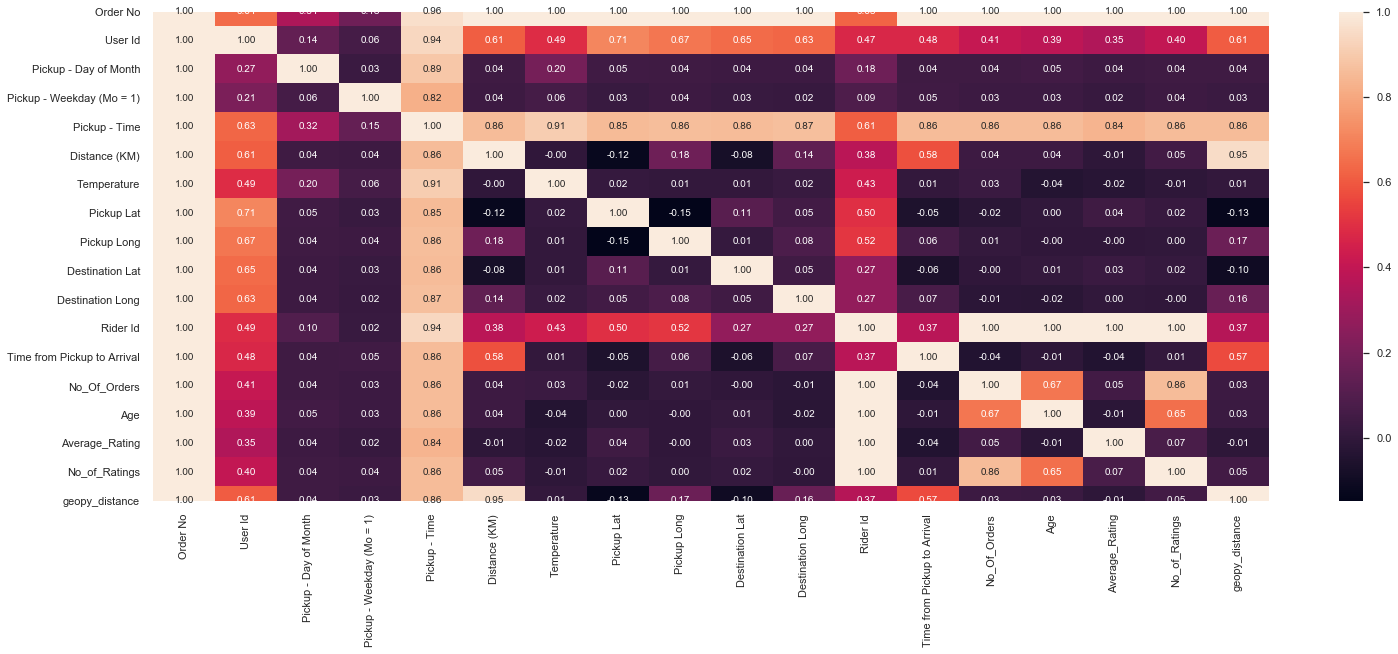

In [44]:
nominal_columns = list(data.select_dtypes(exclude=["number"]).columns)
associations(data,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

### Univariate analysis

#### Time from Pickup to Arrival

In [45]:
data["Time from Pickup to Arrival"].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

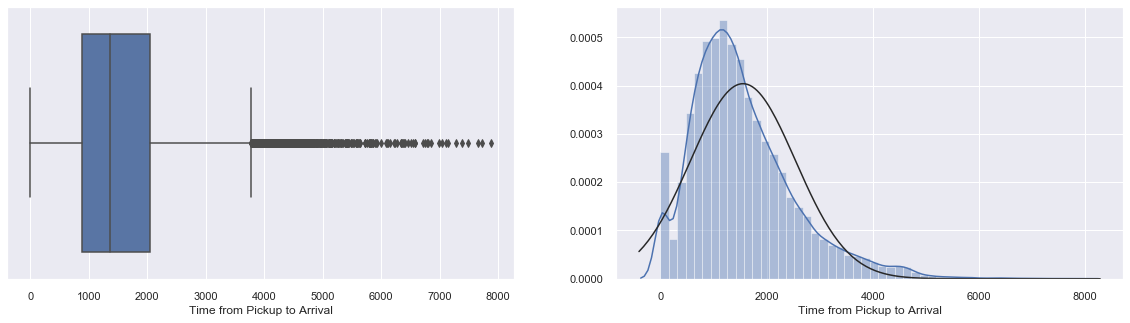

In [46]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data["Time from Pickup to Arrival"],ax=ax[0])
sns.distplot(data["Time from Pickup to Arrival"],fit=norm,ax=ax[1])

In [47]:
data[data["Time from Pickup to Arrival"] == 1].shape

(37, 18)

In [48]:
print(sorted(data["Distance (KM)"].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 44.0, 46.0, 48.0, 49.0]


#### Distance

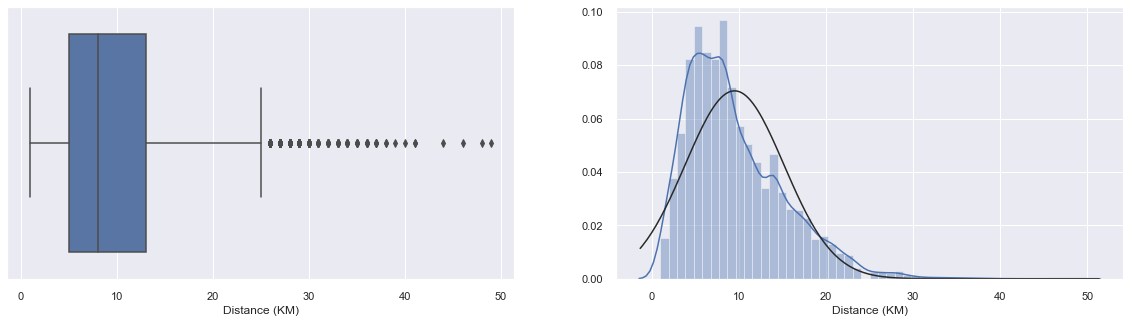

In [49]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data["Distance (KM)"],ax=ax[0])
sns.distplot(data["Distance (KM)"],fit=norm,ax=ax[1])

### Multivariate analysis

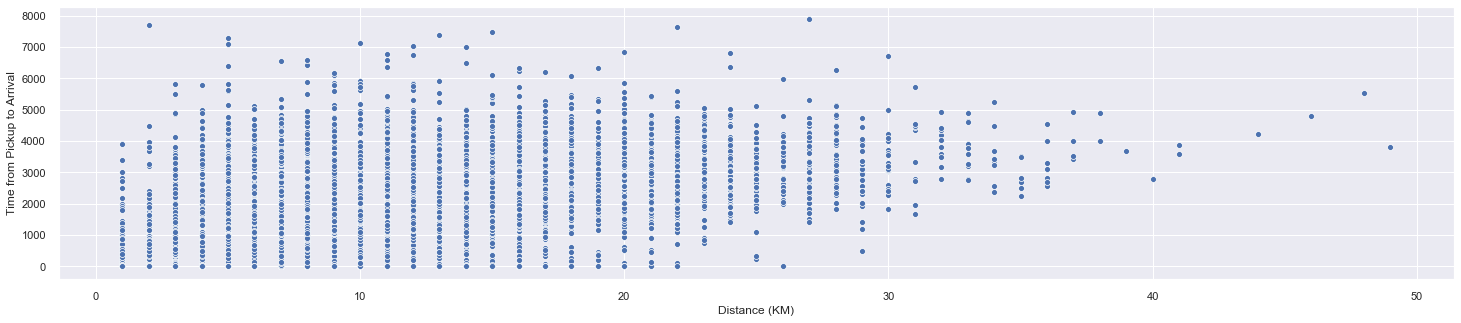

In [50]:
plt.figure(figsize=(25,5))
sns.scatterplot(data["Distance (KM)"], data["Time from Pickup to Arrival"])

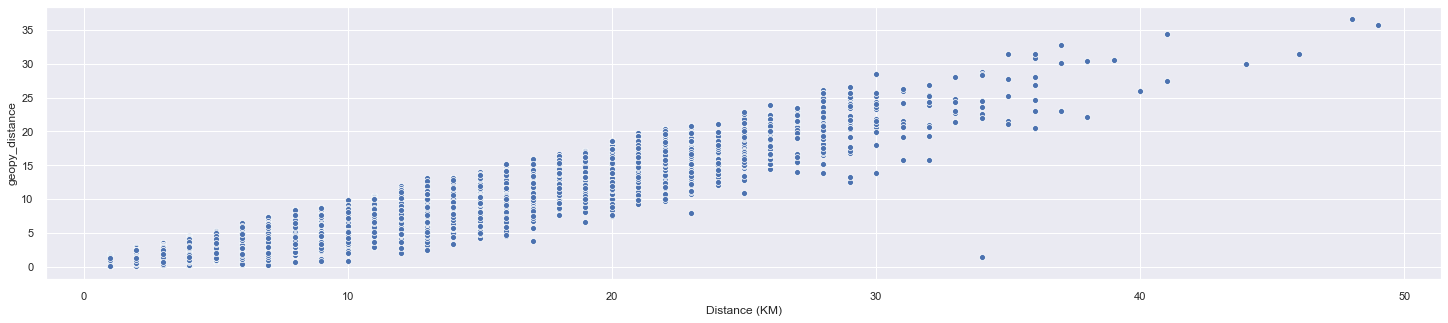

In [51]:
plt.figure(figsize=(25,5))
sns.scatterplot(data["Distance (KM)"], data["geopy_distance"])

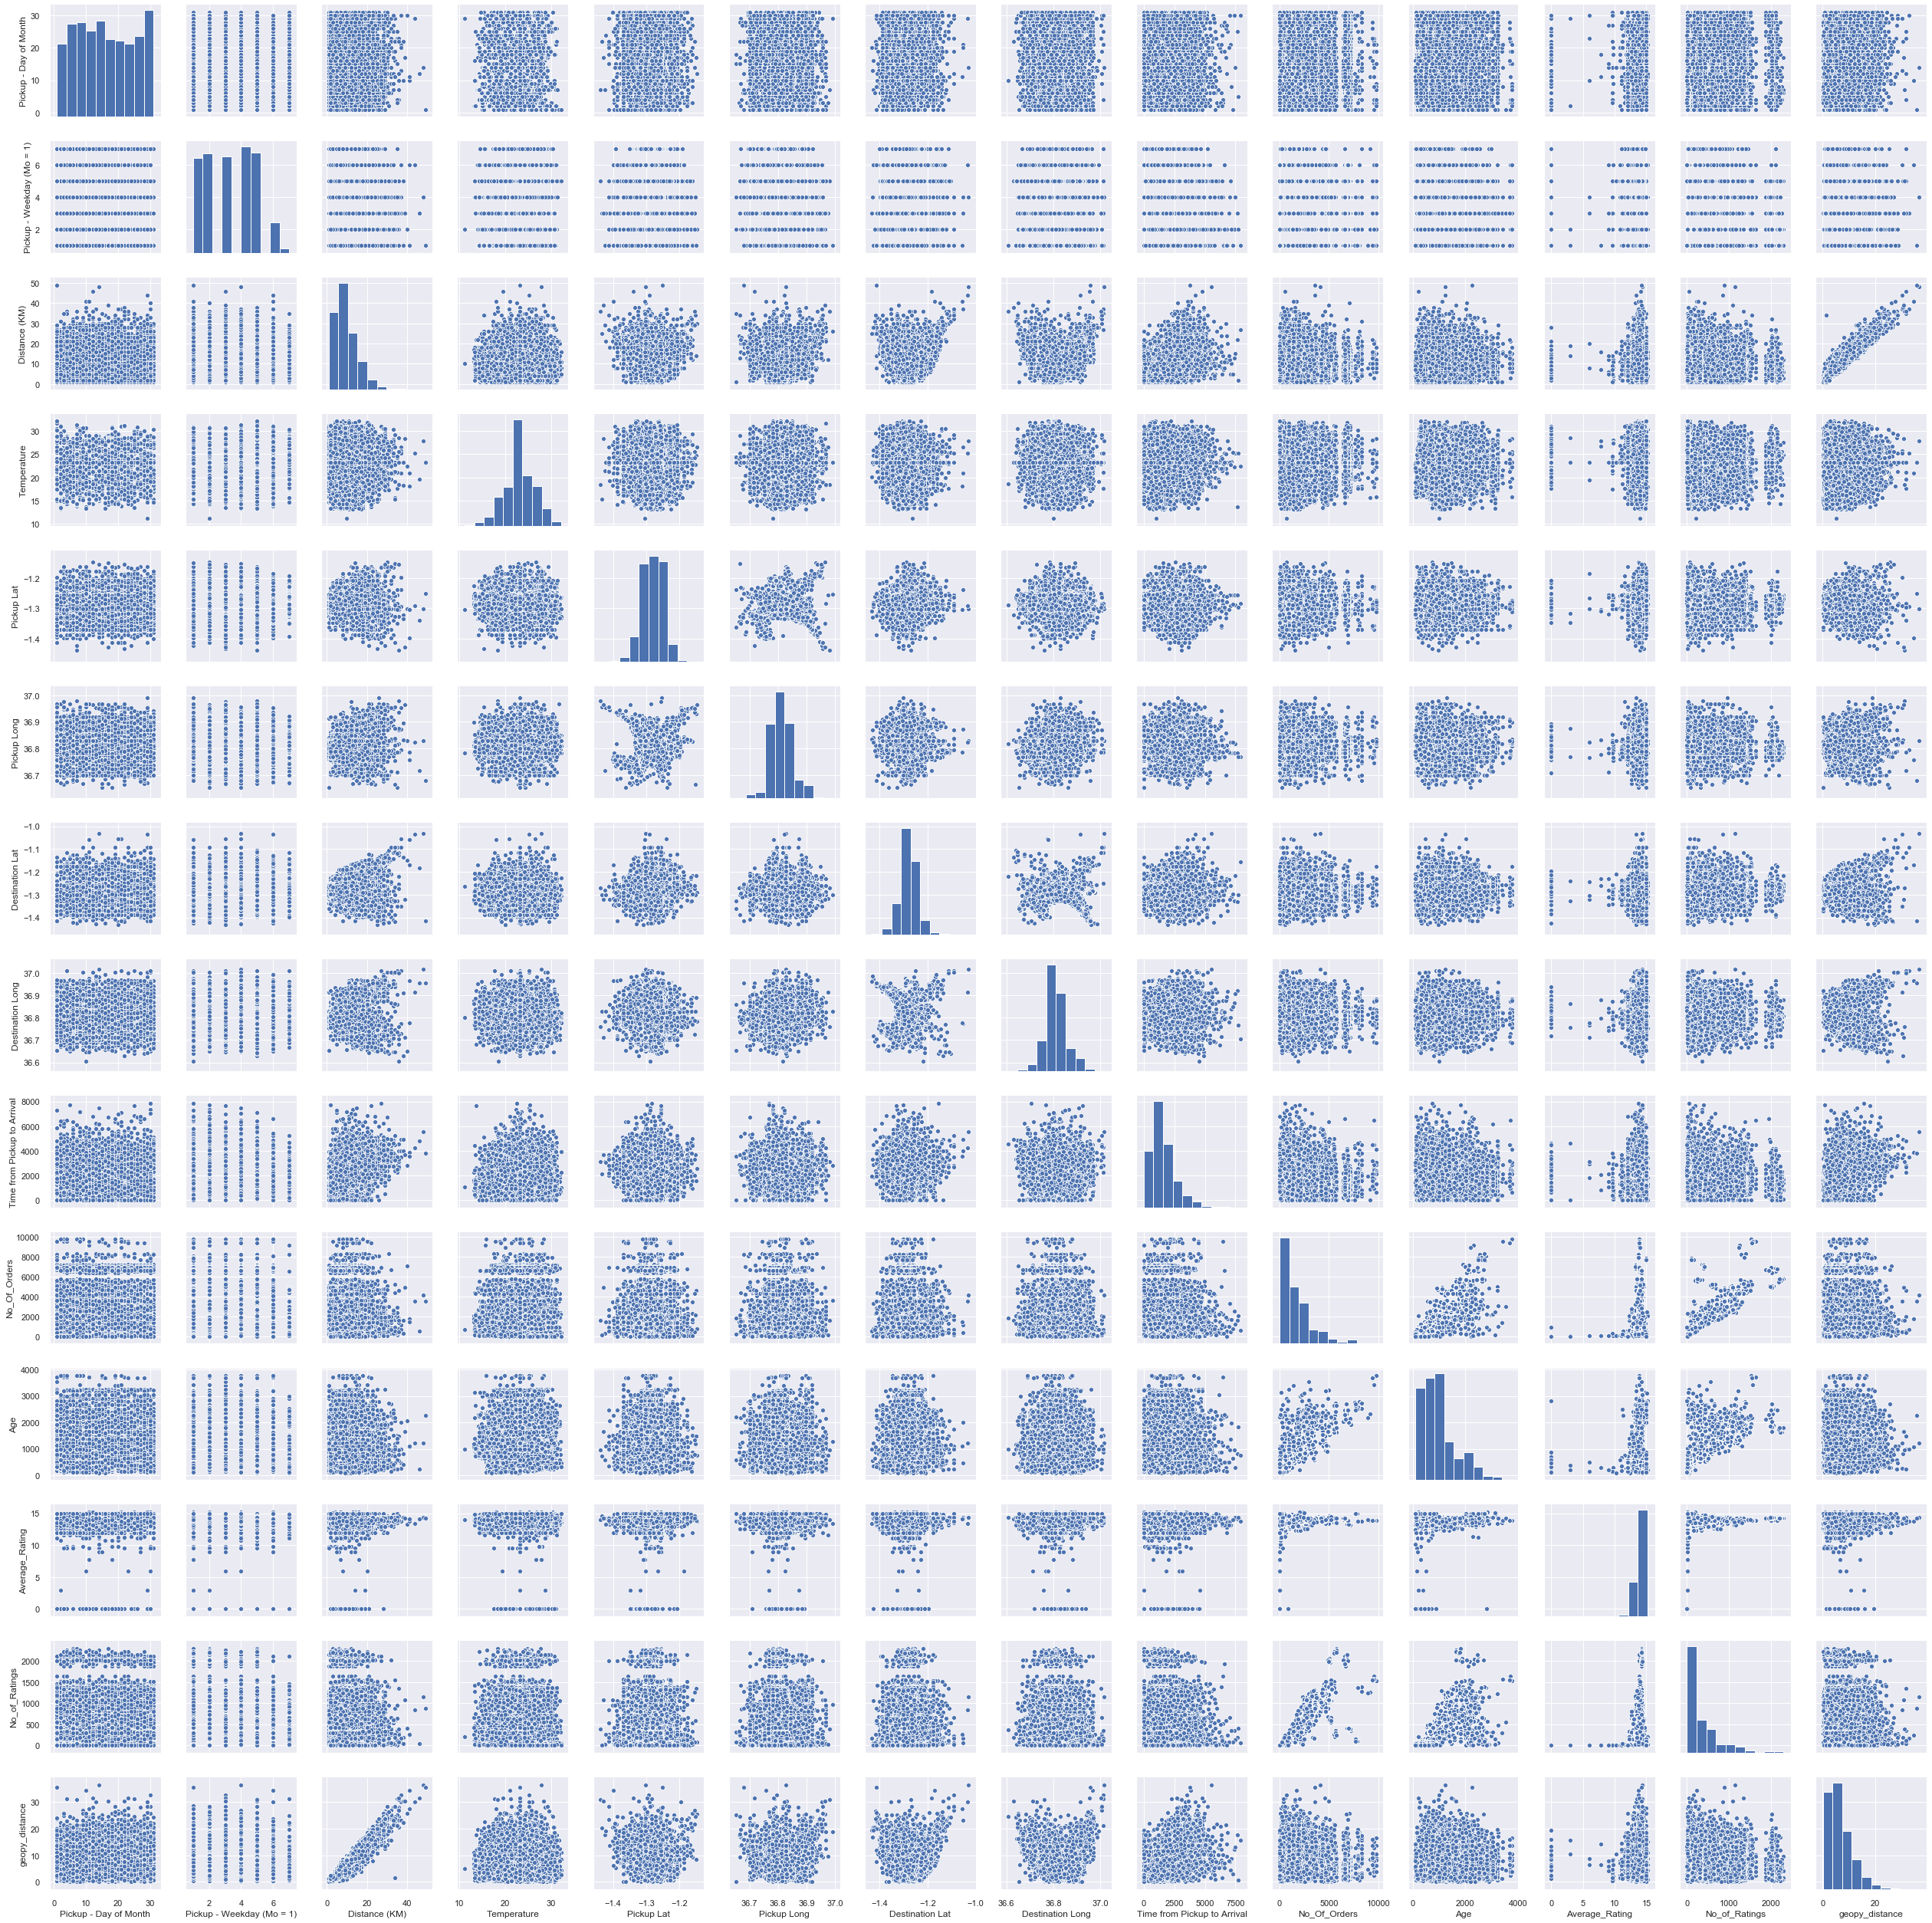

In [52]:
sns.pairplot(data)

### Feature engineering

#### Time to hour

In [53]:
data["Pickup - hour"] = pd.to_datetime(data["Pickup - Time"]).dt.hour.astype("category")
test_zindi["Pickup - hour"] = pd.to_datetime(test_zindi["Pickup - Time"]).dt.hour.astype("category")
data.drop(columns=["Pickup - Time"],inplace=True)
test_zindi.drop(columns=["Pickup - Time"],inplace=True)

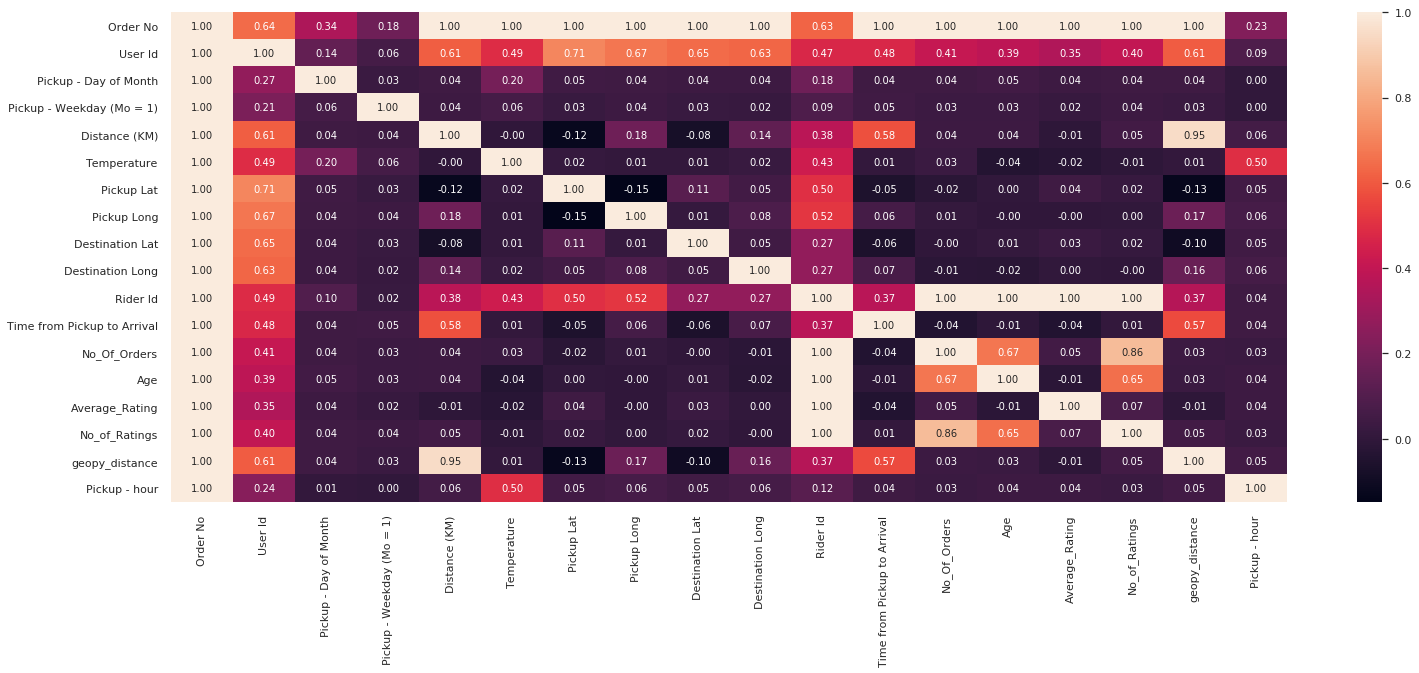

In [171]:
nominal_columns = list(data.select_dtypes(exclude=["number"]).columns)
associations(data,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

### save data and load

In [54]:
# save
data.to_pickle("meetup_data.pkl")
test_zindi.to_pickle("meetup_test.pkl")

In [55]:
data = pd.read_pickle("meetup_data.pkl")
test_zindi = pd.read_pickle("meetup_test.pkl")

### Modeling

#### benchmark models

In [56]:
data.drop(columns=["Order No","Rider Id","User Id"],inplace=True)
test_zindi.drop(columns=["Order No","Rider Id","User Id"],inplace=True)

In [57]:
data = data[data.columns.tolist()[0:8] + data.columns.tolist()[9:] + [data.columns.tolist()[8]]]

In [58]:
data.head().T

0        1        2        3        4
Pickup - Day of Month              9       18       31        2       22
Pickup - Weekday (Mo = 1)          5        5        5        2        2
Distance (KM)                      4       20        6       18        7
Temperature                     20.4     24.5     24.7     15.2     19.2
Pickup Lat                  -1.31775 -1.32677 -1.25519 -1.29031 -1.27352
Pickup Long                  36.8304  36.7878  36.7822  36.7574  36.7992
Destination Lat             -1.30041 -1.35624 -1.27341 -1.22352 -1.30043
Destination Long             36.8297  36.9043  36.8182  36.8021  36.7524
No_Of_Orders                    1637     1637     1637     1637     1637
Age                             1309     1309     1309     1309     1309
Average_Rating                  13.8     13.8     13.8     13.8     13.8
No_of_Ratings                    549      549      549      549      549
geopy_distance               1.91959   13.367  4.48491  8.90398  5.99761
Pickup - hour                     10       16       13        7       10
Time from Pickup to Arrival      745     2886     2615     2986     1602

In [59]:
data_without_short_duration = data[data["Time from Pickup to Arrival"] > 10]
data_without_short_duration.shape,data.shape

((20654, 15), (21201, 15))

##### Imports

In [60]:
from sklearn.linear_model import HuberRegressor,SGDRegressor,ElasticNet, Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

##### Training 

In [61]:
def rmse(y_true,y_preds,extras=None):
    return np.sqrt(mean_squared_error(y_true,y_preds))

In [62]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score

In [63]:
train_x,val_x,train_y,val_y = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3)
train_clean_x,val_clean_x,train_clean_y,val_clean_y = train_test_split(data_without_short_duration.iloc[:,:-1],data_without_short_duration.iloc[:,-1],test_size=0.3)

In [64]:
train_clean_x.shape, train_x.shape

((14457, 14), (14840, 14))

In [65]:
train_clean_x.head()

Pickup - Day of Month Pickup - Weekday (Mo = 1)  Distance (KM)  \
982                      14                         1            4.0   
19573                    29                         3           13.0   
19463                     8                         3            5.0   
18499                    28                         2            4.0   
8728                     12                         5           13.0   

       Temperature  Pickup Lat  Pickup Long  Destination Lat  \
982      20.200000   -1.266837    36.799249        -1.262847   
19573    21.100000   -1.301953    36.788458        -1.240218   
19463    23.258889   -1.279395    36.825364        -1.291787   
18499    17.800000   -1.288423    36.772451        -1.290073   
8728     18.400000   -1.261589    36.792873        -1.330929   

       Destination Long  No_Of_Orders     Age  Average_Rating  No_of_Ratings  \
982           36.781805         903.0   824.0            14.0          122.0   
19573         36.766816        6695.0  2109.0            14.2         1874.0   
19463         36.787267         950.0  1357.0            14.0          260.0   
18499         36.789006         526.0   989.0            14.4          187.0   
8728          36.835151        1434.0  1111.0            14.1          257.0   

       geopy_distance Pickup - hour  
982          1.990881            10  
19573        7.238796            16  
19463        4.455738            12  
18499        1.851442            13  
8728         8.995867             9

In [66]:
def rmsle_cv(model,train,y_train,n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(np.mean(rmse))

In [67]:
def benchmark_model(train_x,train_y):
    for Model in [RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,XGBRegressor,LGBMRegressor, ElasticNet, LinearRegression,HuberRegressor]:
        model = Model()
        model_name = model.__class__.__name__
        err = rmsle_cv(model,train_x,train_y)
        print(f"{model_name} :  cross val loss => {err}")

In [68]:
benchmark_model(train_x,train_y)

RandomForestRegressor :  cross val loss => 809.8714558979843
ExtraTreesRegressor :  cross val loss => 817.8133684089853
GradientBoostingRegressor :  cross val loss => 759.8710712491533
[20:47:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:47:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:47:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor :  cross val loss => 759.0944934135653
LGBMRegressor :  cross val loss => 749.025673758399
ElasticNet :  cross val loss => 790.1941327509476
LinearRegression :  cross val loss => 789.0927629160173
HuberRegressor :  cross v

In [69]:
lgbm = LGBMRegressor().fit(train_x,train_y)
xgbm = XGBRegressor().fit(train_x.values,train_y)

rmse(lgbm.predict(val_x),val_y),rmse(xgbm.predict(val_x.values),val_y)

[20:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(775.176191156385, 780.4617778685858)

In [299]:
benchmark_model(train_clean_x,train_clean_y)

RandomForestRegressor :  cross val loss => 808.2556499925224
ExtraTreesRegressor :  cross val loss => 810.6558077217855
GradientBoostingRegressor :  cross val loss => 757.0491932800819
XGBRegressor :  cross val loss => 755.346539169327
LGBMRegressor :  cross val loss => 747.697120682644
ElasticNet :  cross val loss => 783.753712564317
LinearRegression :  cross val loss => 783.036819351548
HuberRegressor :  cross val loss => 805.6942372905908


#### catboost

In [75]:
data = pd.read_pickle("meetup_data.pkl")
test_zindi = pd.read_pickle("meetup_test.pkl")

In [76]:
data = data[data.columns.tolist()[0:11] + data.columns.tolist()[12:] + [data.columns.tolist()[11]]]
data.head()

Order No       User Id Pickup - Day of Month  \
0   Order_No_4211   User_Id_633                     9   
1  Order_No_27440  User_Id_2642                    18   
2  Order_No_14170  User_Id_3339                    31   
3  Order_No_21727  User_Id_3523                     2   
4   Order_No_8301    User_Id_87                    22   

  Pickup - Weekday (Mo = 1)  Distance (KM)  Temperature  Pickup Lat  \
0                         5            4.0         20.4   -1.317755   
1                         5           20.0         24.5   -1.326774   
2                         5            6.0         24.7   -1.255189   
3                         2           18.0         15.2   -1.290315   
4                         2            7.0         19.2   -1.273524   

   Pickup Long  Destination Lat  Destination Long      Rider Id  No_Of_Orders  \
0    36.830370        -1.300406         36.829741  Rider_Id_432        1637.0   
1    36.787807        -1.356237         36.904295  Rider_Id_432        1637.0   
2    36.782203        -1.273412         36.818206  Rider_Id_432        1637.0   
3    36.757377        -1.223520         36.802061  Rider_Id_432        1637.0   
4    36.799220        -1.300431         36.752427  Rider_Id_432        1637.0   

      Age  Average_Rating  No_of_Ratings  geopy_distance Pickup - hour  \
0  1309.0            13.8          549.0        1.919586            10   
1  1309.0            13.8          549.0       13.367010            16   
2  1309.0            13.8          549.0        4.484905            13   
3  1309.0            13.8          549.0        8.903984             7   
4  1309.0            13.8          549.0        5.997613            10   

   Time from Pickup to Arrival  
0                        745.0  
1                       2886.0  
2                       2615.0  
3                       2986.0  
4                       1602.0

In [77]:
data.drop(columns=["Order No"],inplace=True)

In [78]:
train_x,val_x,train_y,val_y = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3)

In [79]:
# initialize Pool
cat_features = ['Pickup - Day of Month','User Id','Pickup - Weekday (Mo = 1)','Rider Id','Pickup - hour']
train_pool = Pool(train_x,train_y ,
                 cat_features=cat_features
                 )
test_pool = Pool(val_x, 
                cat_features=cat_features
                ) 

# specify the training parameters 
model = CatBoostRegressor(loss_function='RMSE')
#train the model
model.fit(train_pool,silent=True)
# make the prediction using the resulting model
predictions = model.predict(test_pool)
err = rmse(val_y, predictions)
print(f"rmse val error: {err}")

rmse val error: 747.39417997711


#### Feature importance

In [80]:

# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title,ax=None):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue',ax=ax) \
       .set_title(title, fontsize = 15)

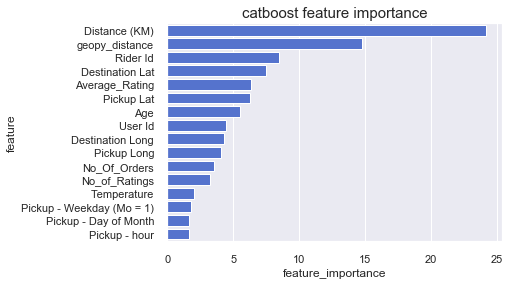

In [81]:
base_imp = imp_df(train_x.columns, model.feature_importances_)
var_imp_plot(base_imp, "catboost feature importance")    
plt.show()

### Submission

#### train on all data

In [82]:
data = pd.read_pickle("meetup_data.pkl")
data.drop(columns=["Order No"],inplace=True)
test_zindi = pd.read_pickle("meetup_test.pkl")

In [83]:
data = data[data.columns.tolist()[0:10] + data.columns.tolist()[11:] + [data.columns.tolist()[10]]]
data_without_short_duration = data[data["Time from Pickup to Arrival"] > 10]
data.head()

User Id Pickup - Day of Month Pickup - Weekday (Mo = 1)  \
0   User_Id_633                     9                         5   
1  User_Id_2642                    18                         5   
2  User_Id_3339                    31                         5   
3  User_Id_3523                     2                         2   
4    User_Id_87                    22                         2   

   Distance (KM)  Temperature  Pickup Lat  Pickup Long  Destination Lat  \
0            4.0         20.4   -1.317755    36.830370        -1.300406   
1           20.0         24.5   -1.326774    36.787807        -1.356237   
2            6.0         24.7   -1.255189    36.782203        -1.273412   
3           18.0         15.2   -1.290315    36.757377        -1.223520   
4            7.0         19.2   -1.273524    36.799220        -1.300431   

   Destination Long      Rider Id  No_Of_Orders     Age  Average_Rating  \
0         36.829741  Rider_Id_432        1637.0  1309.0            13.8   
1         36.904295  Rider_Id_432        1637.0  1309.0            13.8   
2         36.818206  Rider_Id_432        1637.0  1309.0            13.8   
3         36.802061  Rider_Id_432        1637.0  1309.0            13.8   
4         36.752427  Rider_Id_432        1637.0  1309.0            13.8   

   No_of_Ratings  geopy_distance Pickup - hour  Time from Pickup to Arrival  
0          549.0        1.919586            10                        745.0  
1          549.0       13.367010            16                       2886.0  
2          549.0        4.484905            13                       2615.0  
3          549.0        8.903984             7                       2986.0  
4          549.0        5.997613            10                       1602.0

In [84]:
all_train_x = data.iloc[:,:-1]
all_train_y = data.iloc[:,-1]

all_train_clean_x = data_without_short_duration.iloc[:,:-1]
all_train_clean_y = data_without_short_duration.iloc[:,-1]

In [85]:
cat_features = ['Pickup - Day of Month','User Id','Pickup - Weekday (Mo = 1)','Rider Id','Pickup - hour']
all_train_pool = Pool(all_train_x,all_train_y ,
                 cat_features=cat_features
                 )
all_train_clean_pool = Pool(all_train_clean_x,all_train_clean_y ,
                 cat_features=cat_features
                 )
model = CatBoostRegressor(loss_function='RMSE')
model_clean = CatBoostRegressor(loss_function='RMSE')

model.fit(all_train_pool,silent=True)
model_clean.fit(all_train_clean_pool,silent=True)

In [86]:
submission.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                        567.0
1  Order_No_12736                       4903.0
2    Order_No_768                       5649.0
3  Order_No_15332                          NaN
4  Order_No_21373                          NaN

In [87]:
len(set(test_zindi["Order No"]).intersection(set(submission["Order_No"]))) == test_zindi.shape[0]

True

In [88]:
order_no = test_zindi["Order No"]
test_zindi.drop(columns=["Order No"],inplace=True)

In [89]:
submission_pool = Pool(test_zindi, 
                cat_features=cat_features
                ) 

In [90]:
predictions = model_clean.predict(submission_pool)
df_submission = pd.DataFrame()
df_submission["Order_No"] = order_no
df_submission["Time from Pickup to Arrival"] = predictions

In [91]:
df_submission.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                  1697.942252
1   Order_No_2699                  2848.895125
2  Order_No_21486                  1872.283402
3  Order_No_19336                  2384.124793
4  Order_No_20374                  2573.288833

In [392]:
df_submission.to_csv("clean_catboost.csv",index=False)

### TODO

- More data exploration
- analyze riders
- dimensionality reduction
- Finetune hyperparams
- model stacking
- One hot encode features
- create more features
- get features from other data sources
- loop over these
- Give me your ideas pls ..